# Parameter inference for a distribution within the Bayesian Framework


In [78]:
# Didactical script for Bayesian inference of parameters
# O. Wani (Mar, 2021)
# Metropolis-Hastings algorithm:
# adapted from fJoseph Moukarzel (Towards data science: https://tinyurl.com/yxaqdjv2)

import matplotlib.pyplot as plt # package for good plots
import pandas as pd             # package for data analytics
import numpy as np              # package for efficient numerics
import plotly.offline as py     # for dynamic plots
import cufflinks as cf          # plotly bindings for pandas
import seaborn as sns           # for nice plots
import scipy.stats as stats     # fit a GEV distribution
import math

from ipynb.fs.full.import_data import get_data, get_station_name # Import data

# other modules that can be employed for inference
#import emcee
#import mc3
#import sys
#from pydream.parameters import FlatParam
#from pydream.core import run_dream
#from pydream.convergence import  Gelman_Rubin

In [40]:
# test hypothesis on GEV
sample1 = stats.genextreme.rvs( size=1000, c = 0,  loc=10, scale=1)
sample2 = stats.genextreme.rvs( size=1000, c = 0,  loc=10, scale=1)
sample3 = stats.genextreme.rvs( size=1000, c = 0,  loc=102, scale=1) 
sta = np.append(sample1 ,sample2)
non_sta = np.append(sample1 ,sample3)
# use scipy.stats to get the 'best guess' values of parameters

In [8]:
sam_dis = stats.gamma.rvs( size=1000, a = 1, scale=1)

(array([476., 258., 130.,  66.,  37.,  16.,   6.,   5.,   4.,   2.]),
 array([9.14645662e-05, 7.21794287e-01, 1.44349711e+00, 2.16519993e+00,
        2.88690275e+00, 3.60860558e+00, 4.33030840e+00, 5.05201122e+00,
        5.77371404e+00, 6.49541687e+00, 7.21711969e+00]),
 <BarContainer object of 10 artists>)

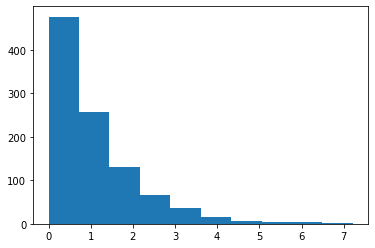

In [9]:
plt.hist(sam_dis)

In [151]:
#Let's generate samples from a gaussian copula, with a parameter corr

corr = 0.99 # tune it from 0 to 1. It is more sensitive between 0.9 and 1

mvnorm = stats.multivariate_normal([0, 0], [[1., corr], [corr, 1.]])
x = mvnorm.rvs((100000,)) # generate many samples so that we do our binning trick to sample from the conditional copula
norm = stats.norm([0],[1])
x_unif = norm.cdf(x)

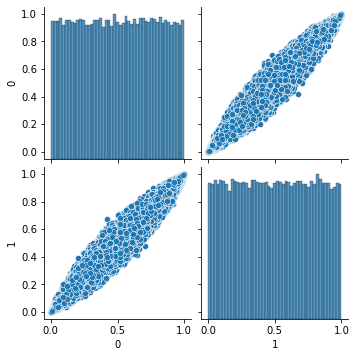

In [152]:
sns.pairplot(pd.DataFrame(x_unif))
# you can see that the marginals of this bivariate distribution have a support of (0,1) and are uniform. 
#This shows it is a copula.

In [153]:
# generate a time series from the copula

time_len = 5000 # length of the quantile time series
ts = [0.5] # initial value
a = x_unif[x_unif[:, 1].argsort()]

# this is where we bin the bivariate copula samples to generate conditional univariate samples

for i in range(time_len):
    f = math.floor(10*ts[i])/10
    c = f+0.1
    ts.append(np.random.choice(a[(a[:,1] > f) & (a[:,1] < c),0])) 

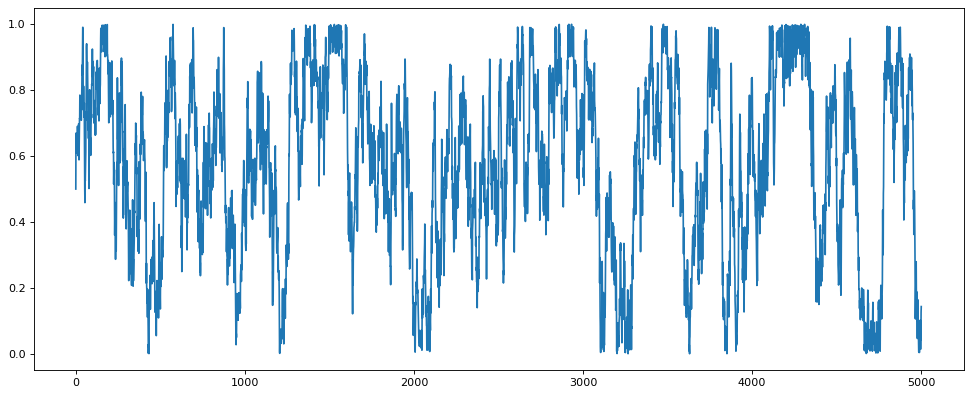

In [154]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(ts) # show the autocorrelated quantile time series
# Using ts as quantiles, you can get the autocorrelated time series from the marginal distribution of discharge

In [117]:
stats.invgamma.rvs(2.9, size=1)

array([0.2968327])

In [42]:
shape1, loc1, scale1 =stats.genextreme.fit(data=sample3)
print(shape1, loc1, scale1)

0.015790113437554678 102.05725552348508 1.0359432654266534


In [43]:
# import data 
HJ_precip = get_data(4,['Precipitation'])#.loc['2005-1-1':'2015-1-1'])
HJ_sm = get_data(4,['SoilMoisture'])
HJ_temp = get_data(4,['SoilTemperature'])

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


In [44]:
HJ_sm.loc['2000-1-1':'2015-1-1']

,CENMET_SoilMoisture_10cm,CENMET_SoilMoisture_20cm,CENMET_SoilMoisture_50cm,CENMET_SoilMoisture_100cm,PRIMET_SoilMoisture_10cm,PRIMET_SoilMoisture_20cm,PRIMET_SoilMoisture_50cm,PRIMET_SoilMoisture_100cm,UPLMET_SoilMoisture_10cm,UPLMET_SoilMoisture_20cm,UPLMET_SoilMoisture_50cm,UPLMET_SoilMoisture_100cm,VANMET_SoilMoisture_10cm,VANMET_SoilMoisture_20cm,VANMET_SoilMoisture_50cm,VANMET_SoilMoisture_100cm
DateTime,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,23.0,20.0,21.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,28.0,25.0,26.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,28.0,25.0,27.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,29.0,26.0,28.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,28.0,26.0,57.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-28,13.0,17.0,25.0,23.0,28.0,25.0,26.0,32.0,41.0,29.0,46.563111,61.0,29.0,32.0,45.0,83.0
2014-12-29,13.0,17.0,25.0,23.0,28.0,25.0,26.0,62.0,40.0,29.0,46.563111,61.0,29.0,32.0,43.0,80.0
2014-12-30,13.0,17.0,25.0,23.0,24.0,23.0,26.0,67.0,40.0,28.0,44.919323,59.0,29.0,32.0,42.0,75.0


<AxesSubplot:title={'center':'Maximum annual prcipitation'}, ylabel='Frequency'>

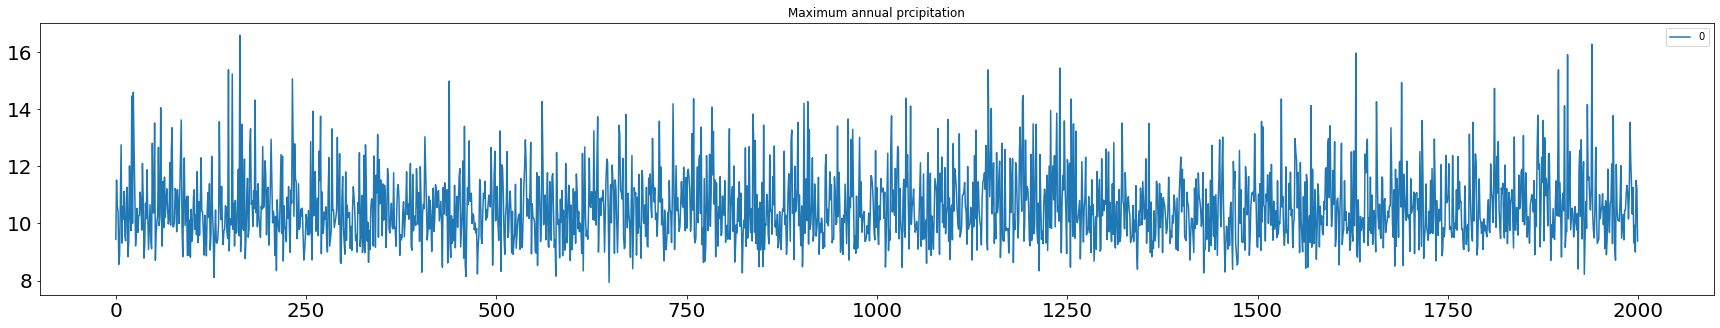

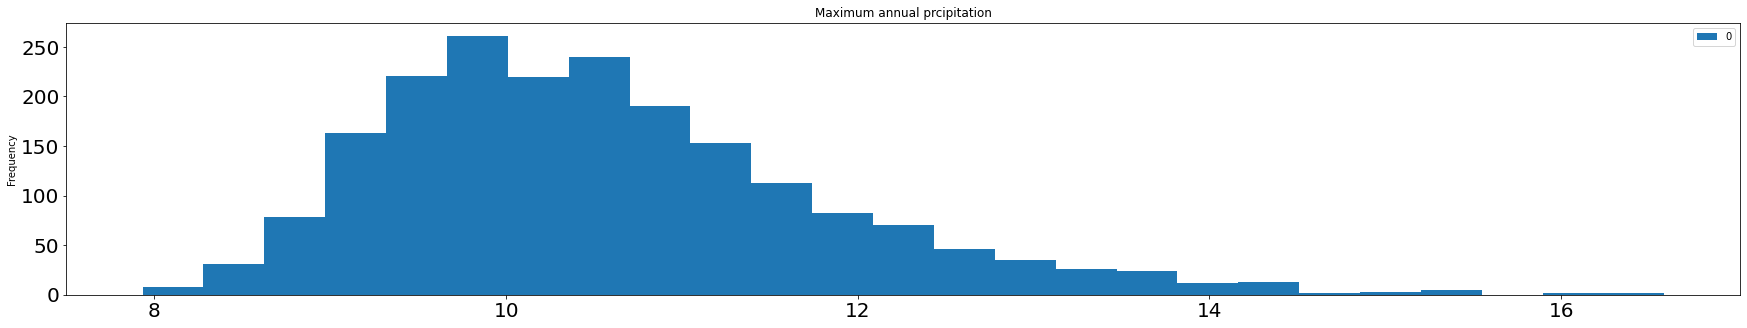

In [45]:
pd.DataFrame(sta).plot(kind='line', figsize=[30,5], fontsize = 20, title = 'Maximum annual prcipitation')
pd.DataFrame(sta).plot(kind='hist', figsize=[30,5], fontsize = 20, title = 'Maximum annual prcipitation', bins=25)

In [46]:
# use scipy.stats to get the 'best guess' values of parameters
shape1, loc1, scale1 =stats.genextreme.fit(sta)
print(shape1, loc1, scale1)

0.009728765610649061 9.9969384334199 0.9984381999499425


In [47]:
# write the code for inference using the Bayesian 'machinery'

#define prior
def log_prior(par):
    par = par[1:3]
    if(all(i >= -10 for i in par)):
        return 0
    else:
        return -np.inf

#define likelihood function

def log_lik_gev(par,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(stats.genextreme(par[0],par[1],par[2]).pdf([data])))

#define posterior
def log_post(par, data):
    if (log_prior(par)==-np.inf):
        lp = log_prior(par)
    else: 
        lp = log_lik_gev(par,data)
    return lp    


In [48]:
# Test log prior
log_prior((-0.1,-0.1,-0.1))

0

In [49]:
# check whether the functions work
a = log_lik_gev((-0.1,0.1,0.1), sta)
b = log_post((-0.1,-0.1,0.1), sta)
a, b

(-48933.68886084719, -49318.374527662614)

In [50]:
#Define jumpt distribution or the transition model

transition_model = lambda x: x+np.multiply(np.random.normal(0,0.1,len(x)),np.ones(len(x)))

#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))

# Define the MCMC algorithm
    
def metropolis_hastings(likelihood_computer, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        
        if (acceptance_rule(x_lik,x_new_lik)):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)
            accepted.append(x)
                
    return np.array(accepted), np.array(rejected)

In [53]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (0,10,1), iterations = 15000, data = sample1, acceptance_rule = acceptance)


<ipython-input-47-dd2dc8ea979c>:16: RuntimeWarning:

divide by zero encountered in log



In [ ]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['shape','location','scale']))

In [ ]:
shape, loc, scale = accepted[:,0].mean(), accepted[:,1].mean(), accepted[:,2].mean()
shape, loc, scale # infered parameter 

In [ ]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

In [54]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (0,10,1), iterations = 15000, data = sta, acceptance_rule = acceptance)


<ipython-input-47-dd2dc8ea979c>:16: RuntimeWarning:

divide by zero encountered in log



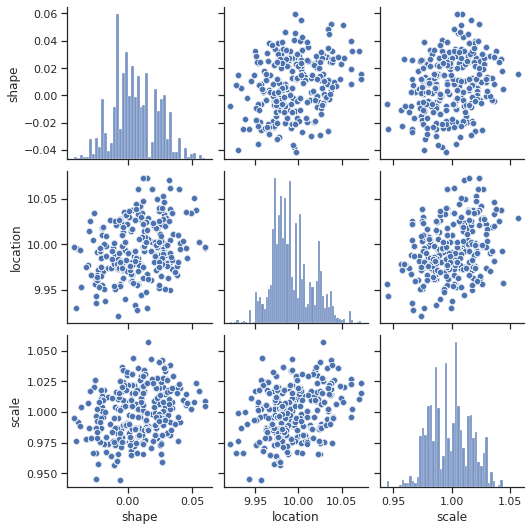

In [55]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['shape','location','scale']))

In [56]:
shape, loc, scale = accepted[:,0].mean(), accepted[:,1].mean(), accepted[:,2].mean()
shape, loc, scale # infered parameter 

(0.006622560647600119, 9.993181517854355, 0.9986974488362131)

In [57]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.01704492211117752, 0.022848596925331092, 0.017120743986869264)

In [58]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (0,10,1), iterations = 15000, data = non_sta, acceptance_rule = acceptance)


<ipython-input-47-dd2dc8ea979c>:16: RuntimeWarning:

divide by zero encountered in log



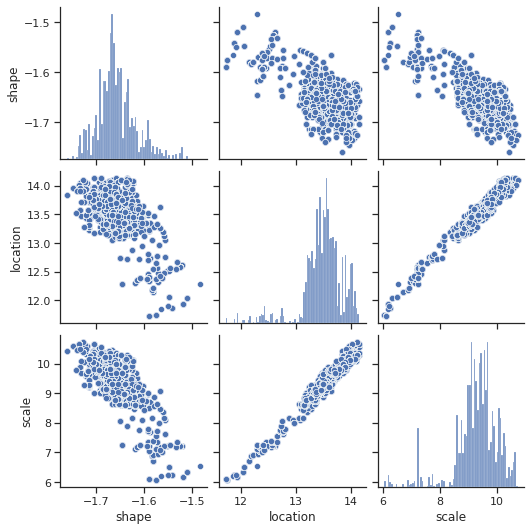

In [59]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['shape','location','scale']))

In [60]:
shape, loc, scale = accepted[:,0].mean(), accepted[:,1].mean(), accepted[:,2].mean()
shape, loc, scale # infered parameter 

(-1.6425059071545711, 13.306168488406232, 8.97143626993222)

In [61]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.08667279076275294, 0.7825036474083881, 1.4740060770245724)

# Try infering the bivariate distribution (with copulas)

In [10]:
# Try to fit a copula
#Source 1:  https://github.com/blent-ai/pycopula
#Source 2:  https://pypi.org/project/copulas/

#from copulas.bivariate import Gumbel
from pycopula.copula import ArchimedeanCopula
from pycopula.copula import GaussianCopula

<AxesSubplot:xlabel='r', ylabel='d'>

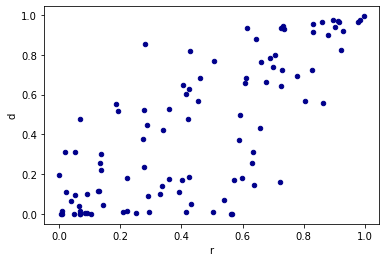

In [12]:
# create bivariate samples with a dependence structure
r = stats.genextreme.rvs( size=100, c =0,  loc=10, scale=1)
d = r + np.random.normal(size=100)

data = pd.DataFrame({'r':r,'d':d})

data_cdf = pd.DataFrame({'r':stats.genextreme.cdf(r,c =0,  loc=10, scale=1), \
                         'd':stats.genextreme.cdf(d,c =0,  loc=10, scale=1)})
data_cdf.plot.scatter(x='r',y ='d', c='DarkBlue')

In [13]:
archimedean = ArchimedeanCopula(family="frank", dim=2)
archimedean.fit(np.array(data_cdf), method="cmle")

(6.693035844253445, None)

In [26]:
archimedean.simulate(archimedean,3)

AttributeError: 'ArchimedeanCopula' object has no attribute 'simulate'

In [65]:
range(len(data_cdf))[1]

1

In [66]:
def cdf_2d(copula, step=40):
	u = np.linspace(1e-4, 1.-1e-4, num=step)
	v = np.linspace(1e-4, 1.-1e-4, num=step)
	C = []

	for i in range(len(u)):
		row = []
		for j in range(len(v)):
			row.append(copula.cdf([ u[i], v[j] ]))
		C.append(row)

	return u, v, np.asarray(C)

In [67]:
def pdf_2d(copula, step=40, zclip=None):
	if zclip == None:
		zclip = 5
	if zclip <= 0:
		raise ValueError("The z-clip value must be strictly greater than 0.")
	u = np.linspace(1e-4, 1.-1e-4, num=step)
	v = np.linspace(1e-4, 1.-1e-4, num=step)
	C = []

	for i in range(len(u)):
		row = []
		for j in range(len(v)):
			if zclip != None:
				row.append(min(copula.pdf([ u[i], v[j] ]), zclip))
			else:
				row.append(copula.pdf([ u[i], v[j] ]))
		C.append(row)

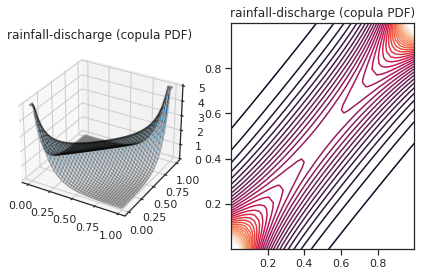

In [68]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from pycopula.visualization import pdf_2d, cdf_2d


# Visualization of CDF and PDF
u, v, c = cdf_2d(archimedean)
u, v, c = pdf_2d(archimedean)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d', title="rainfall-discharge (copula PDF)")
X, Y = np.meshgrid(u, v)

ax.set_zlim(0, 5)
ax.plot_surface(X, Y, c, cmap=cm.Blues)
ax.plot_wireframe(X, Y, c, color='black', alpha=0.3)

ax = fig.add_subplot(122, title="rainfall-discharge (copula PDF)")
ax.contour(X, Y, c, levels = np.arange(0,5,0.15))
fig.tight_layout()

plt.show()

In [69]:
# write the code for inference using the Bayesian 'machinery'

transition_model = lambda x: x+np.multiply(np.random.normal(0,0.1,len(x)),np.ones(len(x)))

#define prior
def log_prior(par):
    par = par[4]
    if(par >= -1 and par <= 10 ):
        return 0
    else:
        return -np.inf

#define likelihood function

def log_lik_gev(par,data):

    p1 = np.sum(np.log(stats.genextreme(0,par[0],par[1]).pdf([data['r']])))
    p2 = np.sum(np.log(stats.genextreme(0,par[2],par[3]).pdf([data['d']])))
    
    data_cdf = pd.DataFrame({'r':stats.genextreme.cdf(data['r'],c =0,  loc=10, scale=1), \
                         'd':stats.genextreme.cdf(data['d'],c =0,  loc=10, scale=1)})
    p3 = np.zeros(len(data_cdf))
    for i in range(len(data_cdf)):
        p3[i] =  archimedean.pdf_param(np.array(data_cdf)[i,:], theta = par[4])
    p3 = np.sum(np.log(p3))
    return p1 + p2 + p3

#define posterior
def log_post(par, data):
    if (log_prior(par)==-np.inf):
        lp = log_prior(par)
    else: 
        lp = log_lik_gev(par,data)
    return lp    


In [70]:
log_post((10,1,10,1,0.5), data)

-356.1072605675738

In [71]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (10,1,10,1,0.5), iterations = 15000, data = data, acceptance_rule = acceptance)


In [72]:
shape, loc, scale = accepted[:,0].mean(), accepted[:,1].mean(), accepted[:,2].mean()
shape, loc, scale # infered parameter 

(9.957903962756804, 1.0510884326959664, 9.847024397530616)

In [73]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.1134258864209922, 0.08449670780122671, 0.13791693029736307)

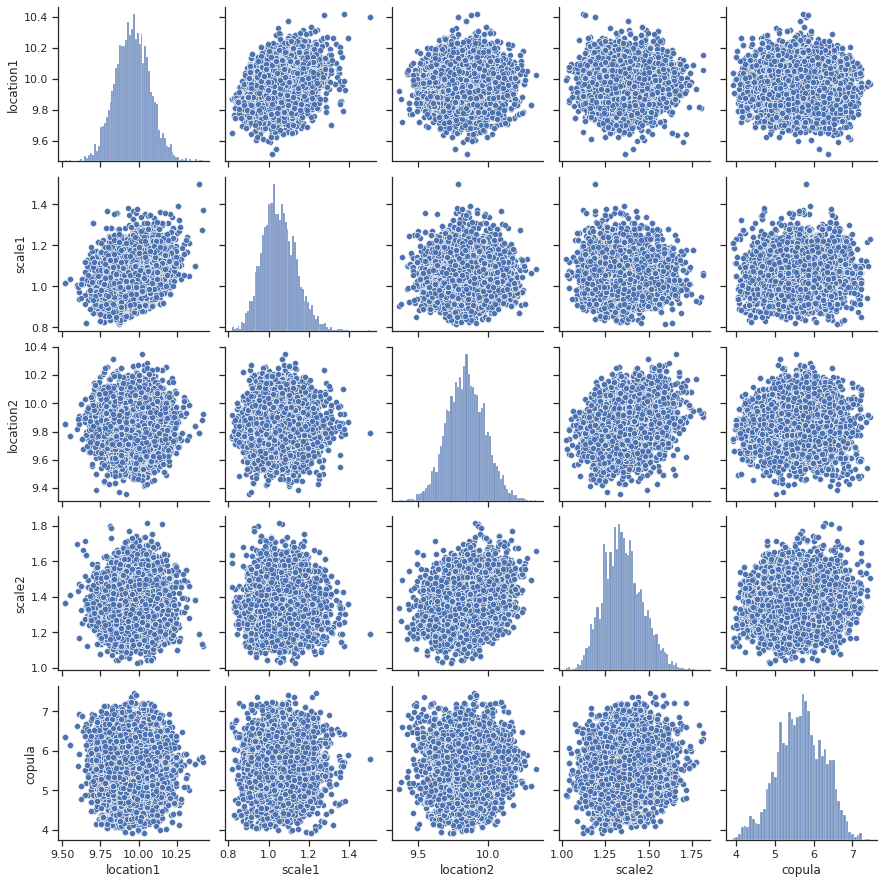

In [74]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))

In [75]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (10,1,10,1,0.5), iterations = 15000, data = data.iloc[1:20], acceptance_rule = acceptance)


In [76]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.2997752286151645, 0.2567740948662023, 0.3941087983362852)

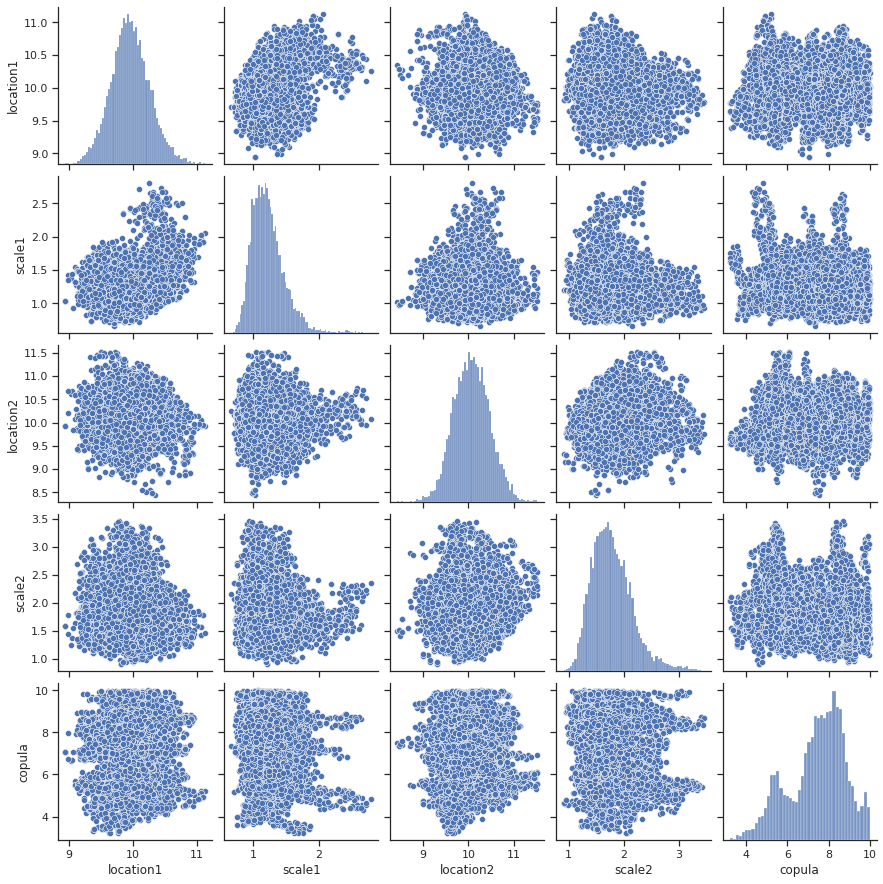

In [77]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))

# Real case study

In [120]:
# real case study
rain = np.array(get_data(4,['Precipitation']).loc['1980-1-1':'2010-1-1']['PRIMET_Precipitation'])
discharge = np.asarray(get_data(4,['Discharge']).loc['1980-1-1':'2010-1-1']['GSLOOK_Discharge'])

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


In [121]:
from scipy.signal import argrelextrema   # get locat extrema

In [122]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [123]:
rain_ma = moving_average(rain, 30)
discharge_ma = moving_average(discharge, 30)

In [124]:
rain_peak = rain_ma[argrelextrema(rain_ma, np.greater)]
discharge_peak = discharge_ma[argrelextrema(discharge_ma, np.greater)]

In [125]:
rain_monthly = rain[0:10950].reshape(30,365)
discharge_monthly = discharge[0:10950].reshape(30,365)
rain_monthly_max = np.amax(rain_monthly, axis=0)
discharge_monthly_max = np.amax(discharge_monthly, axis=0)

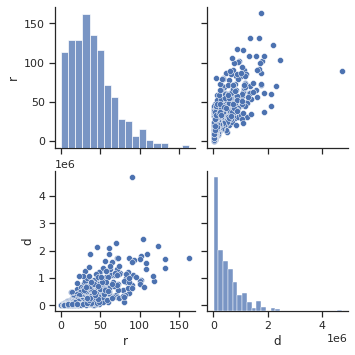

In [126]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max}))

In [127]:
HJA = pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max})

In [128]:
stats.genextreme.fit(rain_monthly_max)

(-0.048583619917148546, 27.19208035237631, 20.53345544908821)

In [129]:
stats.genextreme.fit(discharge_monthly_max)

(-8.728443979895918, 17001.424854096636, 12.436759191039663)

<AxesSubplot:xlabel='r', ylabel='d'>

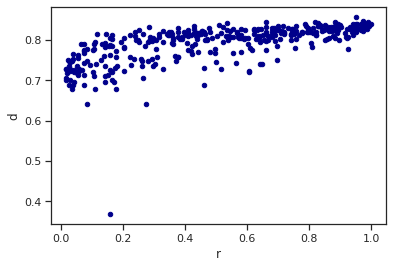

In [130]:
HJA = pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max})

HJA_cdf = pd.DataFrame({'r':stats.genextreme.cdf(rain_monthly_max,c =-0.04,  loc=27.2, scale=20), \
                         'd':stats.genextreme.cdf(discharge_monthly_max,c =-8,  loc=17000, scale=12)})
HJA_cdf.plot.scatter(x='r',y ='d', c='DarkBlue')

In [131]:
archimedean = ArchimedeanCopula(family = "clayton", dim=2)
archimedean.fit(np.array(HJA_cdf), method="cmle")

(1.3789022203653196, None)

In [132]:
transition_model = lambda x: x+np.multiply(np.random.normal(0,0.1,len(x)),[10,10,250,250,15])

#define prior for amh
def log_prior(par):
    par = par[4]
    if(par > 1):
        return 0
    else:
        return -np.inf
    
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = ( 27, 12, 99, 82, 0.75), iterations = 15000, data = HJA.loc[200:380], acceptance_rule = acceptance)


<ipython-input-69-4dc4ca7bbb91>:18: RuntimeWarning:

divide by zero encountered in log

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:297: RuntimeWarning:

divide by zero encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/archimedean_generators.py:20: RuntimeWarning:

divide by zero encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:365: RuntimeWarning:

invalid value encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:297: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-69-4dc4ca7bbb91>:25: RuntimeWarning:

divide by zero encountered in log

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/archimedean_generators.py:20: RuntimeWarning:

overflow encountered in double_scalars



In [133]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.0, 0.0, 0.0)

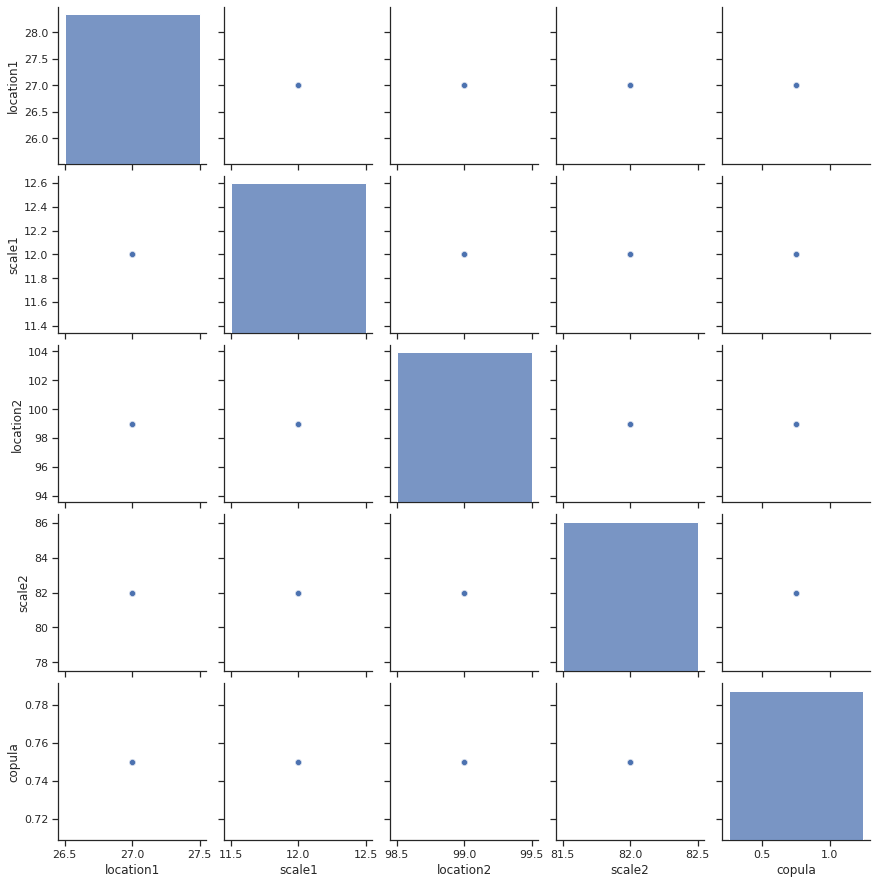

In [134]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))

In [135]:
transition_model = lambda x: x+np.multiply(np.random.normal(0,0.1,len(x)),[10,10,25000,25000,150])
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = ( 27, 12, 99, 82, 0.75), iterations = 15000, data = HJA, acceptance_rule = acceptance)


<ipython-input-69-4dc4ca7bbb91>:18: RuntimeWarning:

divide by zero encountered in log

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:297: RuntimeWarning:

overflow encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/archimedean_generators.py:20: RuntimeWarning:

overflow encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:365: RuntimeWarning:

invalid value encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:297: RuntimeWarning:

divide by zero encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/archimedean_generators.py:20: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-69-4dc4ca7bbb91>:25: RuntimeWarning:

divide by zero encountered in log



In [136]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.0, 0.0, 0.0)

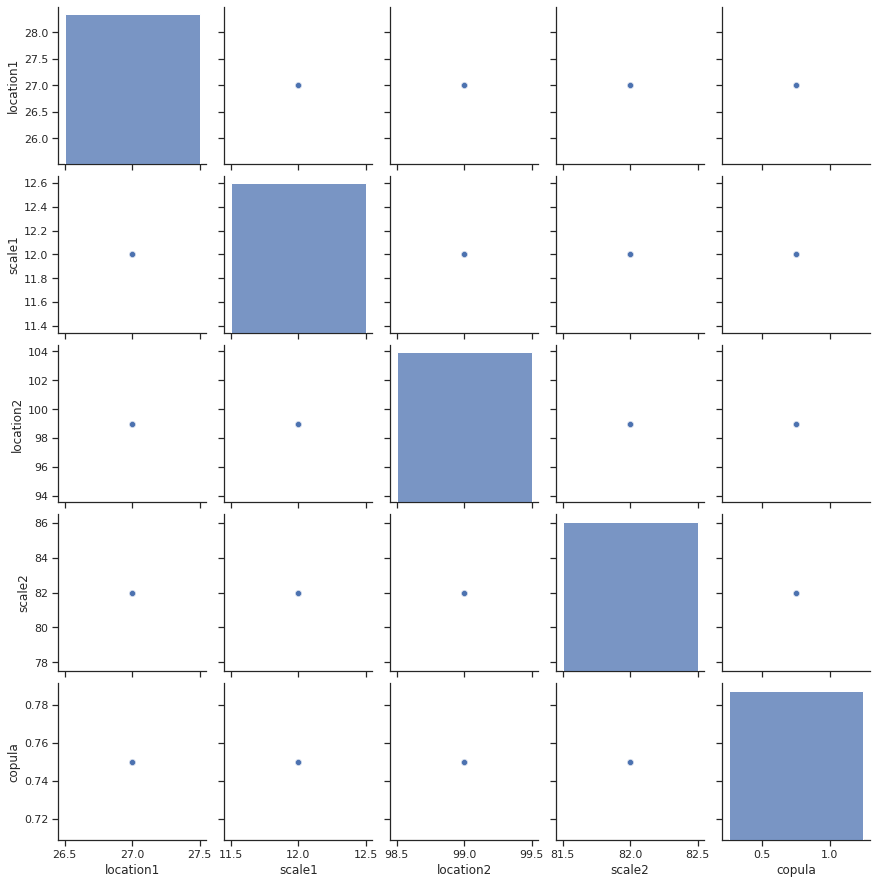

In [137]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))

# Case study 2

In [98]:
#real case study
rain = np.array(get_data(13,['Precipitation']).loc['1980-1-1':'2010-1-1']['WS7_Precipitation'])
discharge = np.asarray(get_data(13,['Discharge']).loc['1980-1-1':'2010-1-1']['WS7_Discharge'])

rain_monthly = rain[0:10950].reshape(30,365)
discharge_monthly = discharge[0:10950].reshape(30,365)
rain_monthly_max = np.amax(rain_monthly, axis=0)
discharge_monthly_max = np.amax(discharge_monthly, axis=0)

Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']
Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']


In [99]:
discharge_monthly

array([[ 7.279175  ,  6.46191667,  4.09178333, ...,  3.73075   ,
         3.87008571,  3.945225  ],
       [ 3.73075   ,  3.4681    ,  3.28532   , ...,  3.91794   ,
         3.97756667,  3.8256    ],
       [ 3.769     ,  3.925425  ,  3.7435    , ..., 15.51665   ,
        19.7742    , 15.743425  ],
       ...,
       [33.48744   , 31.31498   , 24.50478   , ...,  4.187375  ,
        26.71941667, 63.18916154],
       [24.36846667, 18.8428    , 15.708725  , ..., 15.7689    ,
        13.76074286, 11.580875  ],
       [12.87725714, 23.28348333, 17.58416   , ...,  5.13384286,
         4.78695   ,  4.55615   ]])

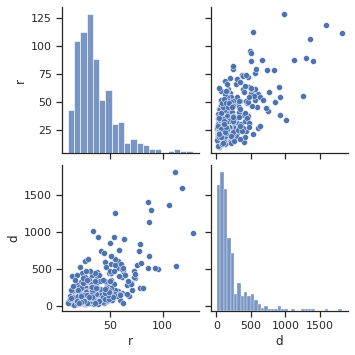

In [100]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max}))

In [101]:
print(stats.genextreme.fit(rain_monthly_max))
print(stats.genextreme.fit(discharge_monthly_max))

(-0.17483525823053997, 27.54464622200259, 11.867732227689306)
(-0.6037471532759598, 99.06081372651587, 82.00363421222949)


<AxesSubplot:xlabel='r', ylabel='d'>

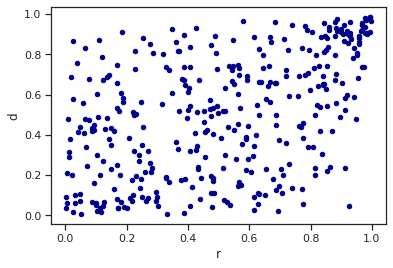

In [102]:
HB = pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max})
HB_cdf = pd.DataFrame({'r':stats.genextreme.cdf(rain_monthly_max,c =-0.17,  loc=27, scale=11), \
                         'd':stats.genextreme.cdf(discharge_monthly_max,c =-0.603,  loc= 99, scale=82)})
HB_cdf.plot.scatter(x='r',y ='d', c='DarkBlue')

In [103]:
transition_model = lambda x: x+np.multiply(np.random.normal(0,0.1,len(x)),[10,10,250,250,10])

#define prior for amh
def log_prior(par):
    par = par[4]
    if(par > 1):
        return 0
    else:
        return -np.inf

In [104]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = ( 25, 11, 90, 85, 0.75), iterations = 15000, data = HB.loc[200:380], acceptance_rule = acceptance)

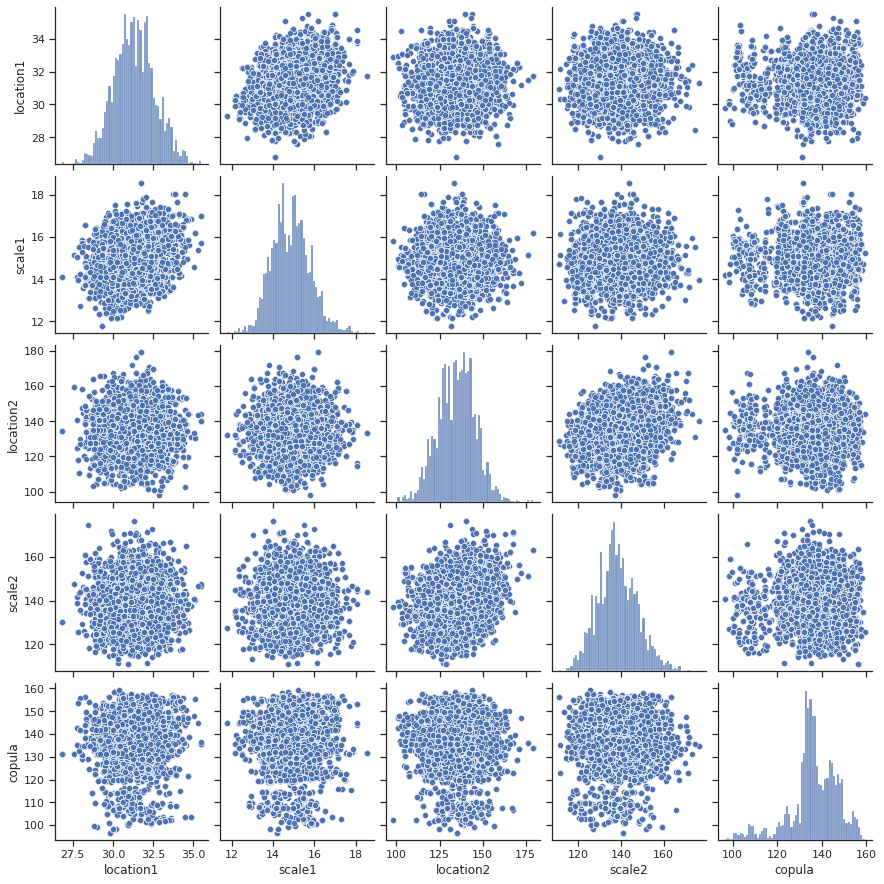

In [105]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))

In [106]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = ( 25, 11, 90, 85, 0.75), iterations = 15000, data = HB.loc[100:380], acceptance_rule = acceptance)

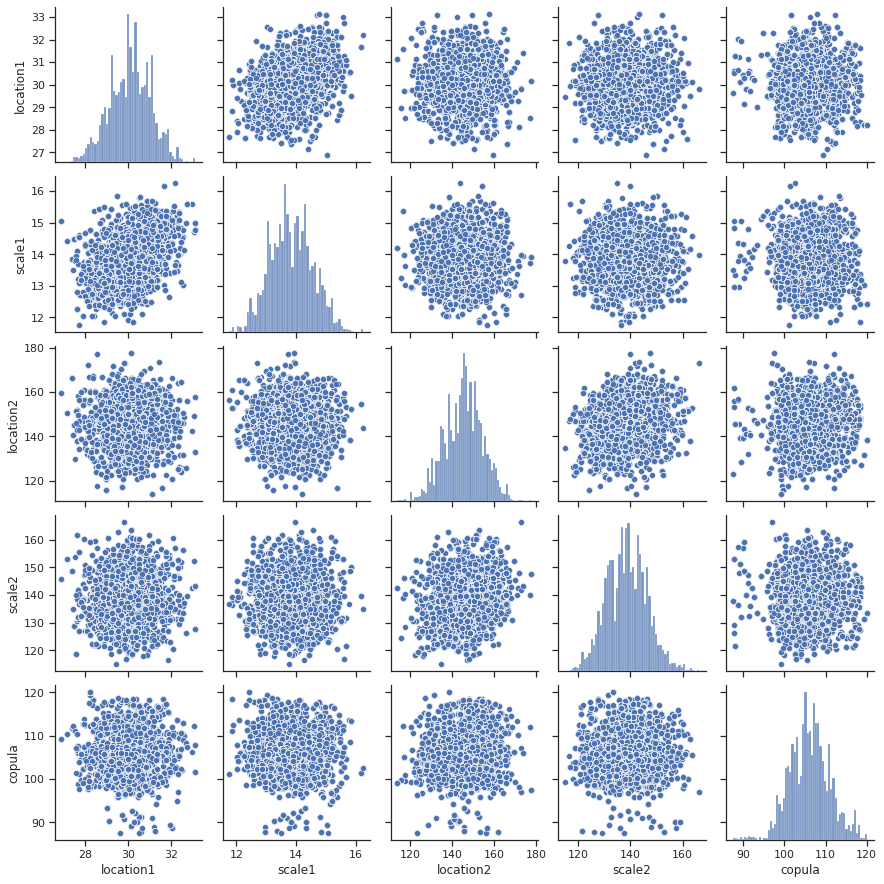

In [107]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))

# Case study 3

In [138]:
# real case study
rain = np.array(get_data(25,['Precipitation']).loc['1980-1-1':'2010-1-1']['049_Precipitation'])
discharge = np.asarray(get_data(25,['Discharge']).loc['1980-1-1':'2010-1-1']['036_Discharge'])

rain_monthly = rain[0:10950].reshape(30,365)
discharge_monthly = discharge[0:10950].reshape(30,365)
rain_monthly_max = np.amax(rain_monthly, axis=0)
discharge_monthly_max = np.amax(discharge_monthly, axis=0)

Reynolds
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'VaporPressure', 'SoilMoisture']
Reynolds
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'VaporPressure', 'SoilMoisture']


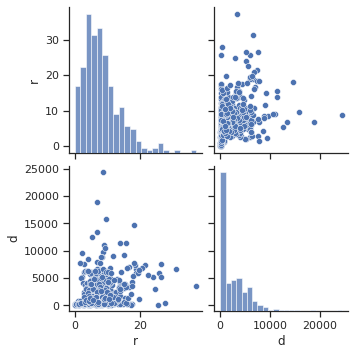

In [139]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max}))

In [140]:
print(stats.genextreme.fit(rain_monthly_max))
print(stats.genextreme.fit(discharge_monthly_max))

(-0.08236199297910765, 5.517007558208487, 3.9542044918252923)
(-1.562592394827787, 205.69820544304025, 372.01349091768134)


<AxesSubplot:xlabel='r', ylabel='d'>

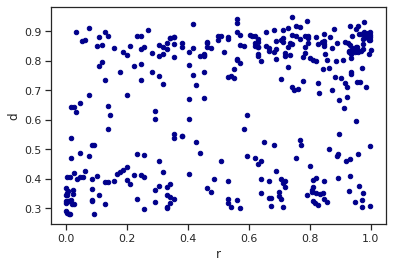

In [142]:
HB = pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max})
HB_cdf = pd.DataFrame({'r':stats.genextreme.cdf(rain_monthly_max,c =-0.08,  loc= 5, scale= 3), \
                         'd':stats.genextreme.cdf(discharge_monthly_max,c =-1.57,  loc=205, scale= 370)})
HB_cdf.plot.scatter(x='r',y ='d', c='DarkBlue')

In [143]:
transition_model = lambda x: x+np.multiply(np.random.normal(0,0.1,len(x)),[2,2,250,250,10])

#define prior 
def log_prior(par):
    par = par[4]
    if(par > 1):
        return 0
    else:
        return -np.inf

In [144]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (5, 3, 200, 370, 0.75), iterations = 15000, data = HB.loc[200:380], acceptance_rule = acceptance)

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:297: RuntimeWarning:

overflow encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/archimedean_generators.py:20: RuntimeWarning:

overflow encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:365: RuntimeWarning:

invalid value encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:297: RuntimeWarning:

divide by zero encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/archimedean_generators.py:20: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-69-4dc4ca7bbb91>:25: RuntimeWarning:

divide by zero encountered in log



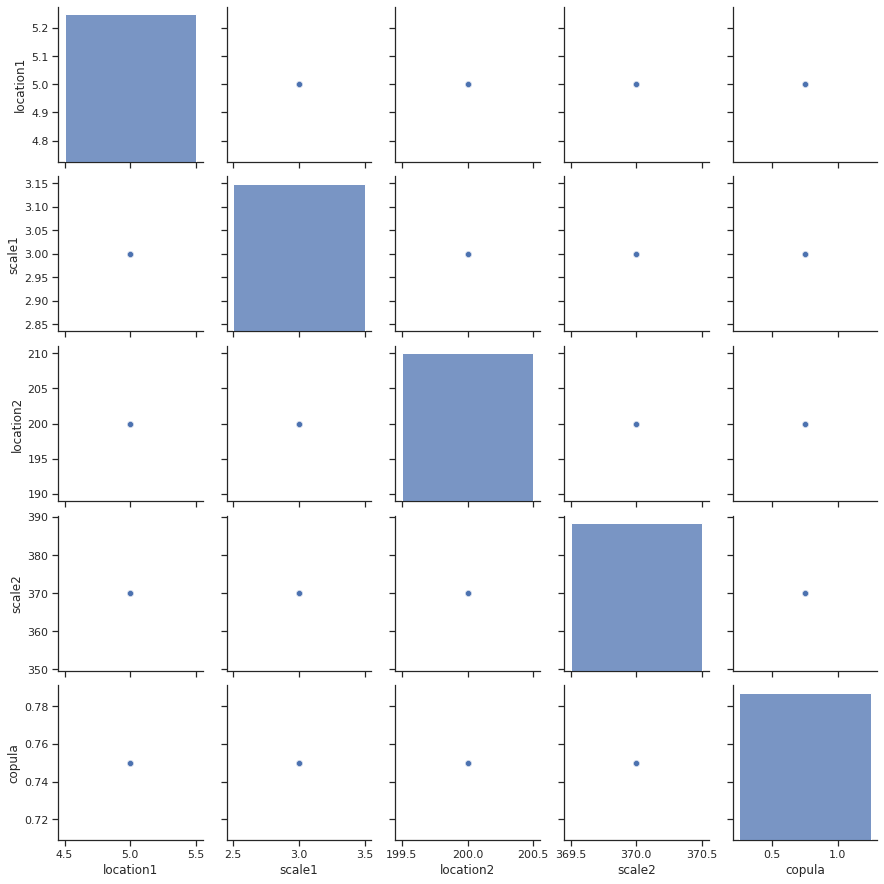

In [145]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))

In [115]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (5, 3, 200, 370, 0.75), iterations = 15000, data = HB, acceptance_rule = acceptance)

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:297: RuntimeWarning:

divide by zero encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/archimedean_generators.py:20: RuntimeWarning:

divide by zero encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:365: RuntimeWarning:

invalid value encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/copula.py:297: RuntimeWarning:

overflow encountered in double_scalars

/home/waniomar/anaconda3/lib/python3.8/site-packages/pycopula/archimedean_generators.py:20: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-69-4dc4ca7bbb91>:25: RuntimeWarning:

divide by zero encountered in log



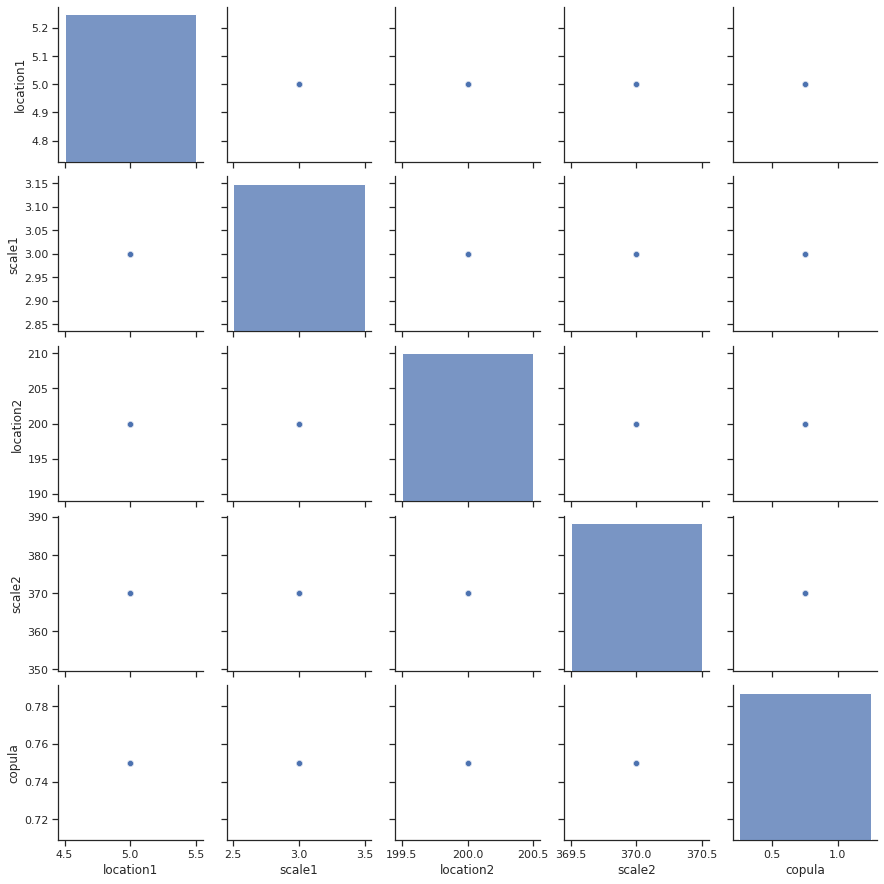

In [116]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))